# Market Positioning of Mobile

### Abstract
There is a new mobile company and the CEO wants to give a tough fight to big companies like Apple, Samsung etc. He has no idea of how to estimate the price of mobiles his company creates. A simple assumption of the prices will not be profitable in this competitive world. To solve this problem he collects sales data of mobile phones of various companies. Thus, the CEO has hired you to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price 
### Problem Statement
Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.

* __battery_power__ : Total energy a battery can store in one time measured in mAh
* __clock_speed__ : The speed at which microprocessor executes instructions
* __fc__ : Front Camera megapixels
* __int_memory__ : Internal Memory in Gigabytes
* __m_dep__ : Mobile Depth in cm
* __mobile_wt__ : Weight of the mobile phone
* __n_cores__ : Number of cores of a processor
* __pc__ : Primary Camera megapixels
* __px_height__ : Pixel Resolution Height
* __px_width__ : Pixel Resolution Width
* __ram__ : Random Access Memory in MegaBytes
* __sc_h__ : Screen Height of mobile in cm
* __sc_w__ : Screen Width of mobile in cm
* __talk_time__ : The longest time that a single battery charge will last when you are
* __price_range__ : This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Assigning working directory

In [3]:
import os
os.chdir('C:/Users/vishali jothimuthu/Desktop/')

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [8]:
df = pd.read_csv('C:/Users/vishali jothimuthu/Desktop/mobile_price.csv')

In [5]:
df_desc = pd.read_csv('C:/Users/vishali jothimuthu/Desktop/desc.csv')

In [6]:
df_desc.index = df_desc['Column']
df_desc.drop('Column', axis=1, inplace=True)
df_desc = df_desc.T
df_desc.head()

Column,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
Description,Total energy a battery can store in one time measured in mAh,The speed at which microprocessor executes instructions,Front Camera megapixels,Internal Memory in Gigabytes,Mobile Depth in cm,Weight of the mobile phone,Number of cores of a processor,Primary Camera megapixels,Pixel Resolution Height,Pixel Resolution Width,Random Access Memory in MegaBytes,Screen Height of mobile in cm,Screen Width of mobile in cm,The longest time that a single battery charge will last when you are,"This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)."


# Basic commands

In [7]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [8]:
df_desc.head()

Column,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
Description,Total energy a battery can store in one time measured in mAh,The speed at which microprocessor executes instructions,Front Camera megapixels,Internal Memory in Gigabytes,Mobile Depth in cm,Weight of the mobile phone,Number of cores of a processor,Primary Camera megapixels,Pixel Resolution Height,Pixel Resolution Width,Random Access Memory in MegaBytes,Screen Height of mobile in cm,Screen Width of mobile in cm,The longest time that a single battery charge will last when you are,"This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [11]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

# Detecting outliers

In [12]:
def outliers(col, data, remove=False):
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    ub = Q3 + 1.5*IQR
    lb = Q1 - 1.5*IQR
    
    out_ub = sum(data[col]>ub)
    out_lb = sum(data[col]<lb)
    
    if remove:
        data[col][data[col]>ub] = ub
        data[col][data[col]<lb] = lb
        out_ub = sum(data[col]>ub)
        out_lb = sum(data[col]<lb)
    
    sns.distplot(data[col])
    plt.show()
    
    sns.boxplot(data[col])
    plt.show()
    
    print('Upper bound: ', ub)
    print('Lower bound: ', lb)
    print('\n')
    
    print('Number of outliers above upper bound: ', out_ub)
    print('Number of outliers below lower bound: ', out_lb)
    print('\n')
    
    print('Percent of outliers: ', round((out_ub+out_lb)/len(data), 4)*100, '%')
    

#### battery_power

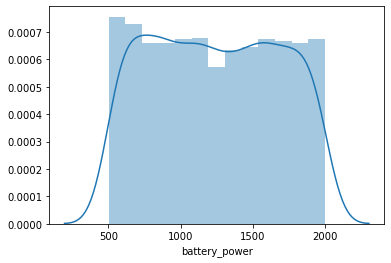

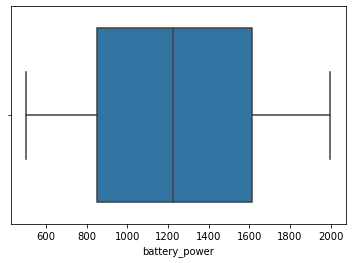

Upper bound:  2760.5
Lower bound:  -293.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [13]:
outliers('battery_power', df)

#### clock_speed

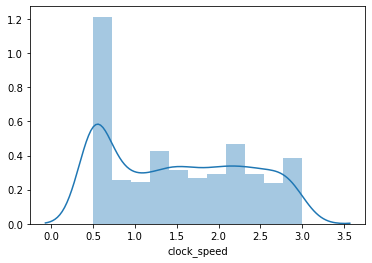

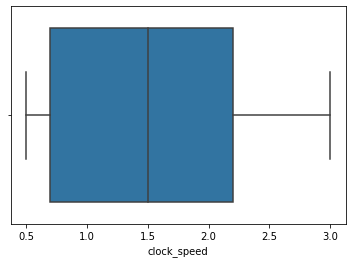

Upper bound:  4.450000000000001
Lower bound:  -1.5500000000000005


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [14]:
outliers('clock_speed', df)

#### fc

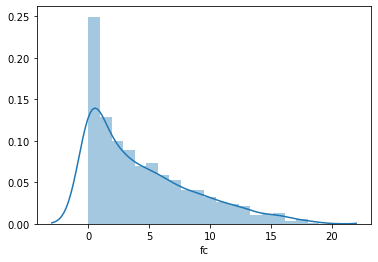

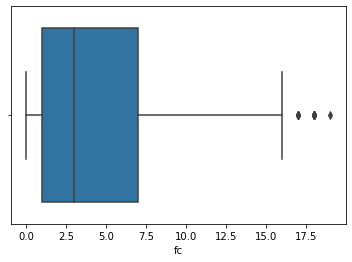

Upper bound:  16.0
Lower bound:  -8.0


Number of outliers above upper bound:  18
Number of outliers below lower bound:  0


Percent of outliers:  0.009 %


In [15]:
outliers('fc', df)

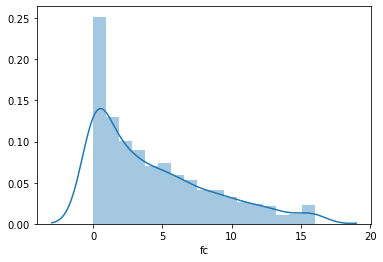

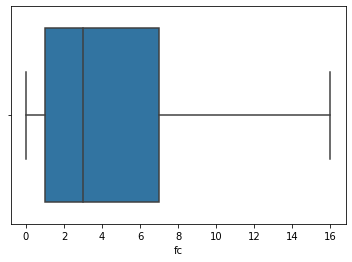

Upper bound:  16.0
Lower bound:  -8.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [16]:
outliers('fc', df, remove=True)

#### int_memory

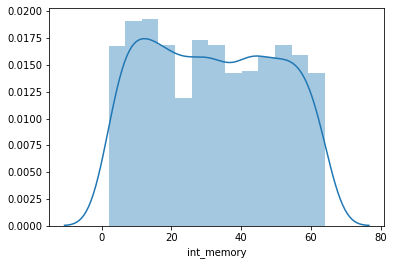

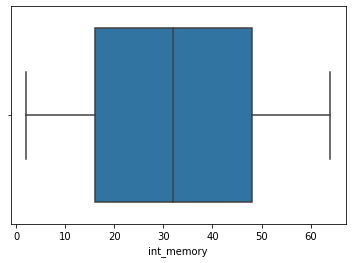

Upper bound:  96.0
Lower bound:  -32.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [17]:
outliers('int_memory', df)

#### m_dep

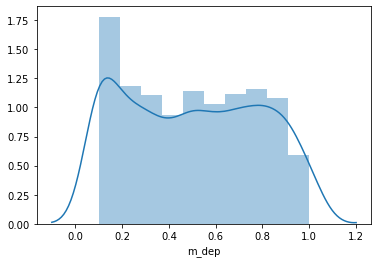

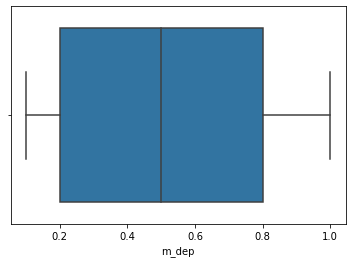

Upper bound:  1.7000000000000002
Lower bound:  -0.7000000000000002


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [18]:
outliers('m_dep', df)

#### mobile_wt

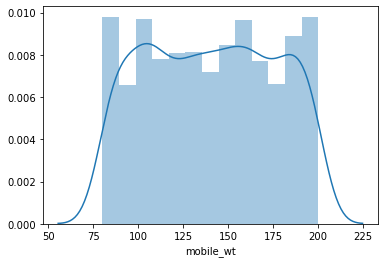

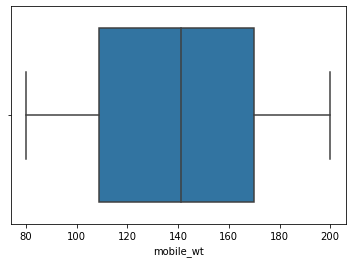

Upper bound:  261.5
Lower bound:  17.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [19]:
outliers('mobile_wt', df)

#### n_cores

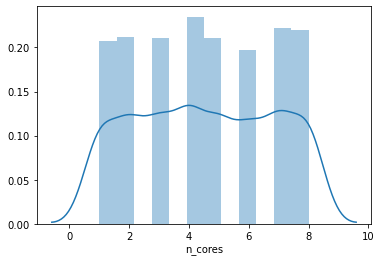

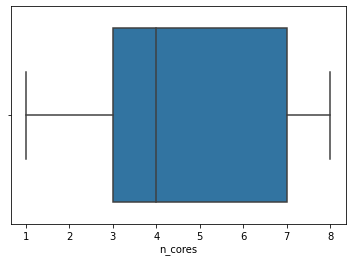

Upper bound:  13.0
Lower bound:  -3.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [20]:
outliers('n_cores', df)

#### pc

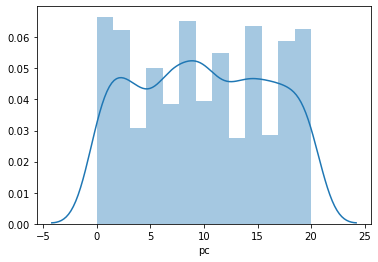

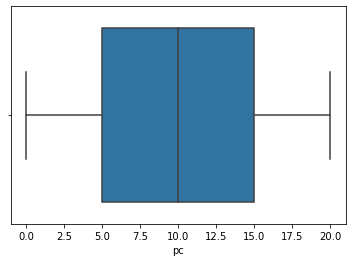

Upper bound:  30.0
Lower bound:  -10.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [21]:
outliers('pc', df)

#### px_height

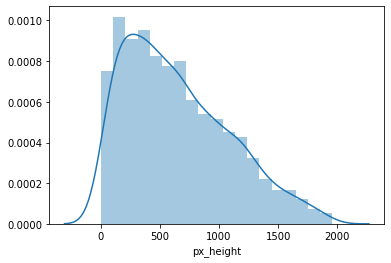

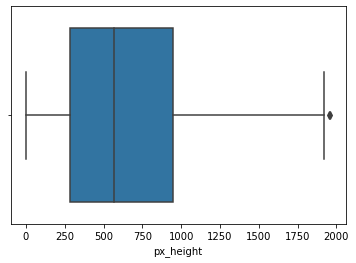

Upper bound:  1944.0
Lower bound:  -714.0


Number of outliers above upper bound:  2
Number of outliers below lower bound:  0


Percent of outliers:  0.001 %


In [22]:
outliers('px_height', df)

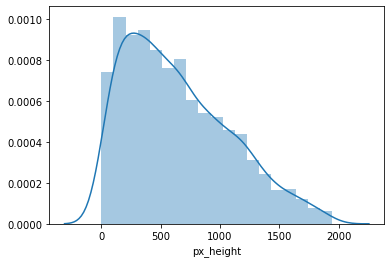

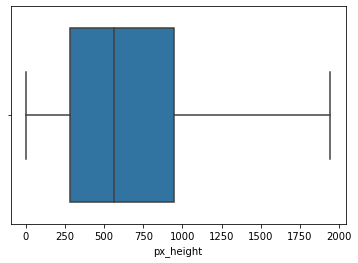

Upper bound:  1944.0
Lower bound:  -714.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [23]:
outliers('px_height', df, remove=True)

#### px_width

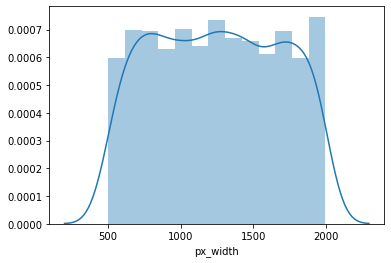

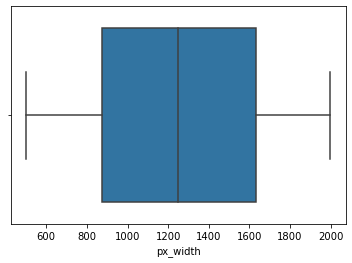

Upper bound:  2770.375
Lower bound:  -262.625


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [24]:
outliers('px_width', df)

#### ram

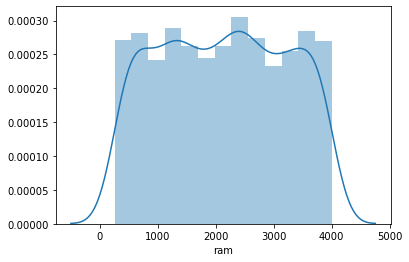

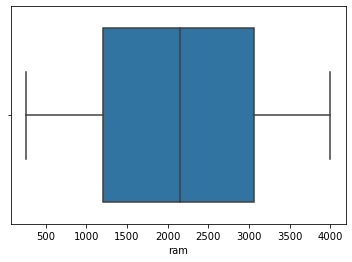

Upper bound:  5850.0
Lower bound:  -1578.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [25]:
outliers('ram', df)

#### sc_h

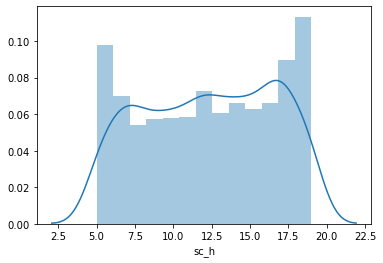

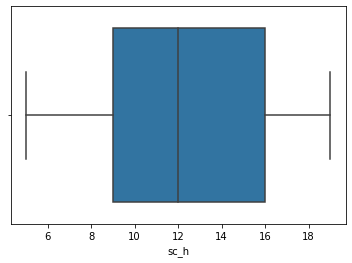

Upper bound:  26.5
Lower bound:  -1.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [26]:
outliers('sc_h', df)

#### sc_w

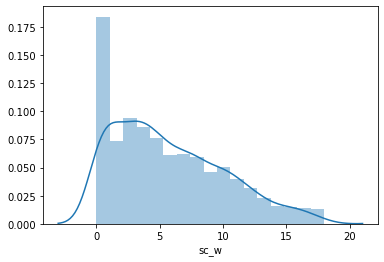

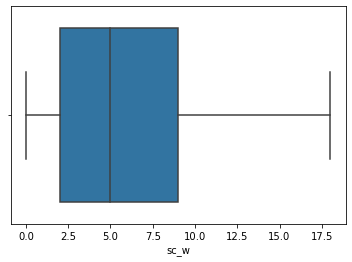

Upper bound:  19.5
Lower bound:  -8.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [27]:
outliers('sc_w', df)

#### talk_time

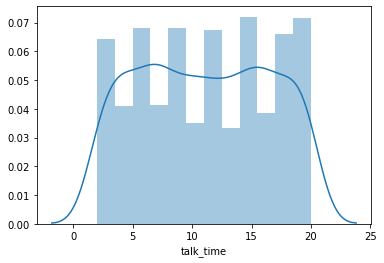

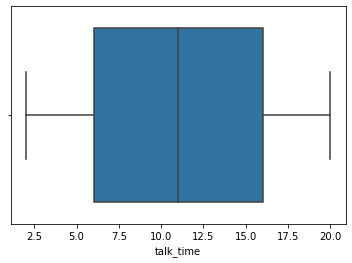

Upper bound:  31.0
Lower bound:  -9.0


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [28]:
outliers('talk_time', df)

#### price_range

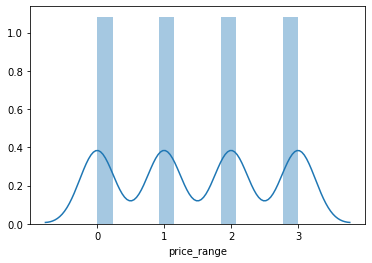

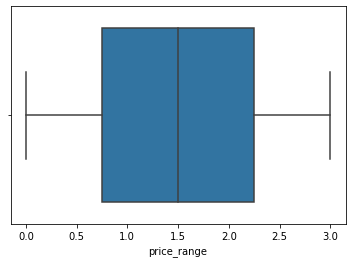

Upper bound:  4.5
Lower bound:  -1.5


Number of outliers above upper bound:  0
Number of outliers below lower bound:  0


Percent of outliers:  0.0 %


In [29]:
outliers('price_range', df)

# Exploratory Data Analysis (EDA)

In [30]:
df.shape

(2000, 15)

In [31]:
X = df.drop('price_range', axis=1)
y = df[['price_range']]

In [32]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [33]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [34]:
X.shape

(2000, 14)

In [35]:
y.shape

(2000, 1)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
968,1923,0.5,7,46,0.5,191,1,10,767,1759,1489,10,9,3
240,633,2.2,0,49,0.1,139,8,1,529,1009,3560,11,1,16
819,1236,0.9,2,57,0.1,188,1,14,517,809,1406,14,12,20
692,781,1.1,2,38,0.4,198,5,7,304,1674,3508,13,8,5
420,1456,0.5,7,7,0.4,105,5,12,823,1104,1587,6,5,20


In [38]:
y_train.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [39]:
X_test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
1860,1646,2.5,3,25,0.6,200,2,5,211,1608,686,8,6,11
353,1182,0.5,7,8,0.5,138,8,16,275,986,2563,19,17,19
1333,1972,2.9,9,14,0.4,196,7,18,293,952,1316,8,1,8
905,989,2.0,4,17,0.2,166,3,19,256,1394,3892,18,7,19
1289,615,0.5,7,58,0.5,130,5,8,1021,1958,1906,14,5,5


In [40]:
y_test.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [41]:
X_train.shape

(1600, 14)

In [42]:
y_train.shape

(1600, 1)

In [43]:
X_test.shape

(400, 14)

In [44]:
y_test.shape

(400, 1)

In [45]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)

In [46]:
Xy_train.shape

(1600, 15)

In [47]:
Xy_test.shape

(400, 15)

### Necessary functions

In [48]:
action = {}

In [49]:
def plot(data):
    plt.figure(figsize=(9,5))
    sns.distplot(data)
    plt.show()
    
    plt.figure(figsize=(9,5))
    sns.boxplot(data)
    plt.show()

In [50]:
def anova(num, cat, data):
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    Ho = f'There is no significant difference between the levels of {cat} with respect to {num} mean (No predictability)'
    Ha = f'There is a significant difference between the levels of {cat} with respect to {num} mean (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    anova_model = ols(f'{cat} ~ C({num})', data=data).fit()
    aov_table = sm.stats.anova_lm(anova_model, typ=2)
    print(aov_table, '\n')
    p = aov_table['PR(>F)'].iloc[0]
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)

In [51]:
def chi2(x, y, data):
    from scipy.stats import chi2_contingency
    
    print(f'Chi square test between {x} and {y}\n')
            
    Ho = f'There is no significant assosiation betweeen {x} and {y} (No predictability)'
    Ha = f'There is relation between {x} and {y} (Good predictor)'

    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')

    ct = pd.crosstab(data[x], data[y]).values
    ct_for_print = pd.crosstab(data[x], data[y], rownames=[f'{x}'], colnames=[f'{y}'], margins=True)
    print(ct_for_print)
    print('\n')

    chi2, p, dof, ex = chi2_contingency(ct)
    print('chi-square stats: ', chi2)
    print('p-value: ', p)
    print('\n')

    alpha = 0.05
    if p>alpha:
        print('Fail to reject null hypothesis, ', Ho)
        print('\n')
        print(f'>>> Drop {x}')
    else:
        print('Reject null hypothesis, ', Ha)
        print('\n')
        print(f'>>> {x} can be useful')

#### price_range

In [52]:
df_desc['price_range']

Description    This is the target variable with the value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
Name: price_range, dtype: object

In [53]:
Xy_train['price_range'].value_counts()

1    409
2    408
0    395
3    388
Name: price_range, dtype: int64

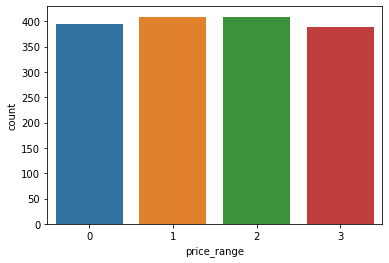

In [54]:
sns.countplot(Xy_train['price_range'])

In [55]:
# All the levels have equal counts

#### battery_power

In [56]:
df_desc['battery_power']

Description    Total energy a battery can store in one time measured in mAh
Name: battery_power, dtype: object

In [57]:
Xy_train.battery_power.head()

968    1923
240     633
819    1236
692     781
420    1456
Name: battery_power, dtype: int64

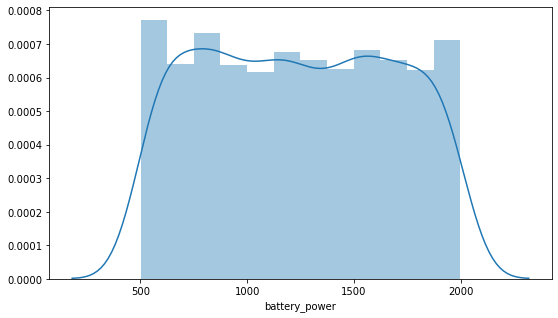

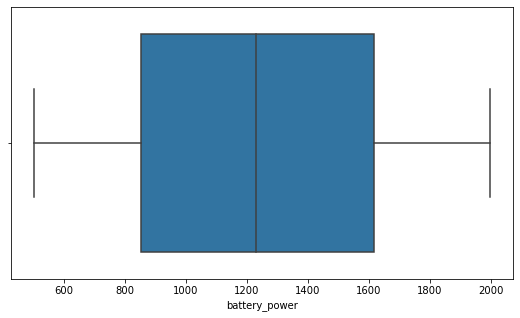

In [58]:
plot(Xy_train['battery_power'])

In [59]:
Xy_train.battery_power.describe()

count    1600.000000
mean     1240.808750
std       440.727396
min       501.000000
25%       852.000000
50%      1231.000000
75%      1619.000000
max      1998.000000
Name: battery_power, dtype: float64

In [60]:
# battery_power ranges from 501 to 1998
# There are almost equal number of observations for different battery_power.
# ie, the distribution is uniform

In [61]:
# Lets see the relation between battery power and price_range

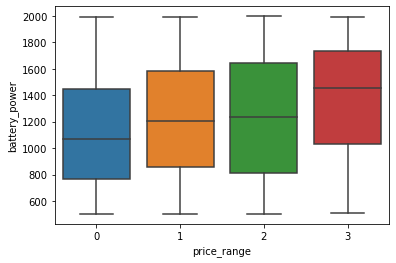

In [62]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['battery_power'])

In [63]:
# The price_range increases as the battery_power increase.

In [64]:
anova(num='battery_power', cat='price_range', data=Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to battery_power mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to battery_power mean (Good predictor)


                       sum_sq     df         F    PR(>F)
C(battery_power)  1267.107708  970.0  1.175788  0.013312
Residual           698.816667  629.0       NaN       NaN 

Reject Ho,  There is a significant difference between the levels of price_range with respect to battery_power mean (Good predictor)


In [65]:
# battery_power can be a good predictor for price_range

#### clock_speed

In [66]:
df_desc['clock_speed']

Description    The speed at which microprocessor executes instructions
Name: clock_speed, dtype: object

In [67]:
Xy_train.clock_speed.describe()

count    1600.000000
mean        1.513625
std         0.820189
min         0.500000
25%         0.675000
50%         1.500000
75%         2.225000
max         3.000000
Name: clock_speed, dtype: float64

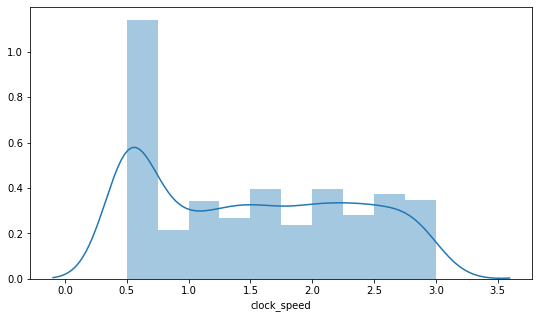

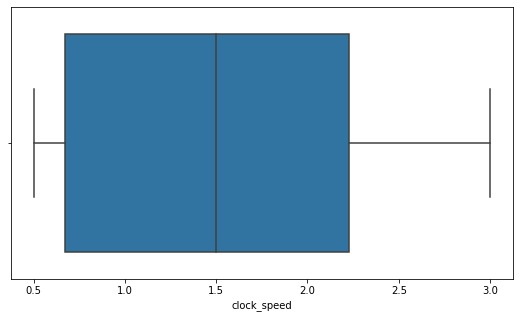

In [68]:
plot(Xy_train['clock_speed'])

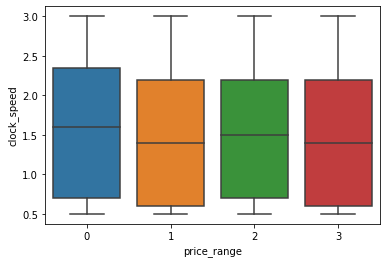

In [69]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['clock_speed'])

In [70]:
anova(num='clock_speed', cat='price_range', data=Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to clock_speed mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to clock_speed mean (Good predictor)


                     sum_sq      df         F    PR(>F)
C(clock_speed)    26.731604    25.0  0.867898  0.652641
Residual        1939.192771  1574.0       NaN       NaN 

Fail to reject Ho,  There is no significant difference between the levels of price_range with respect to clock_speed mean (No predictability)


In [71]:
action['drop'] = ['clock_speed']

#### fc

In [72]:
df_desc['fc']

Description    Front Camera megapixels
Name: fc, dtype: object

In [73]:
Xy_train.fc.describe()

count    1600.000000
mean        4.293125
std         4.289662
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        16.000000
Name: fc, dtype: float64

In [74]:
Xy_train.fc.value_counts()

0     378
1     195
2     149
3     133
5     124
4     110
6      87
7      80
8      59
9      59
10     47
11     40
12     39
16     35
13     33
15     17
14     15
Name: fc, dtype: int64

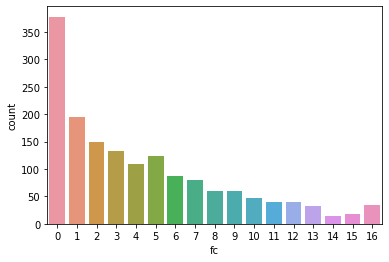

In [75]:
sns.countplot(Xy_train.fc)

In [76]:
# Lets treat fc as a categorical variable
# For that lets club some values together

Xy_train = Xy_train.replace({'fc': {
    0 : 'No pixel',
    1 : '1-5 pixel',
    2 : '1-5 pixel',
    3 : '1-5 pixel',
    4 : '1-5 pixel',
    5 : '1-5 pixel',
    6 : '6-10 pixel',
    7 : '6-10 pixel',
    8 : '6-10 pixel',
    9 : '6-10 pixel',
    10 : '6-10 pixel',
    11 : '11 & above',
    12 : '11 & above',
    13 : '11 & above',
    14 : '11 & above',
    15 : '11 & above',
    16 : '11 & above'
}})

In [77]:
Xy_test = Xy_test.replace({'fc': {
    0 : 'No pixel',
    1 : '1-5 pixel',
    2 : '1-5 pixel',
    3 : '1-5 pixel',
    4 : '1-5 pixel',
    5 : '1-5 pixel',
    6 : '6-10 pixel',
    7 : '6-10 pixel',
    8 : '6-10 pixel',
    9 : '6-10 pixel',
    10 : '6-10 pixel',
    11 : '11 & above',
    12 : '11 & above',
    13 : '11 & above',
    14 : '11 & above',
    15 : '11 & above',
    16 : '11 & above'
}})

In [78]:
Xy_train.fc.value_counts()

1-5 pixel     711
No pixel      378
6-10 pixel    332
11 & above    179
Name: fc, dtype: int64

In [79]:
Xy_test.fc.value_counts()

1-5 pixel     165
6-10 pixel     97
No pixel       96
11 & above     42
Name: fc, dtype: int64

In [80]:
ct = pd.crosstab(index=Xy_train['fc'], columns=Xy_train['price_range'], margins=True)
ct

price_range,0,1,2,3,All
fc,,,,,
1-5 pixel,177,174,175,185,711
11 & above,39,55,45,40,179
6-10 pixel,81,80,93,78,332
No pixel,98,100,95,85,378
All,395,409,408,388,1600


In [81]:
chi2('fc', 'price_range', Xy_train)

Chi square test between fc and price_range

Ho:  There is no significant assosiation betweeen fc and price_range (No predictability)
Ha:  There is relation between fc and price_range (Good predictor)


price_range    0    1    2    3   All
fc                                   
1-5 pixel    177  174  175  185   711
11 & above    39   55   45   40   179
6-10 pixel    81   80   93   78   332
No pixel      98  100   95   85   378
All          395  409  408  388  1600


chi-square stats:  6.281303659971038
p-value:  0.7114674378611324


Fail to reject null hypothesis,  There is no significant assosiation betweeen fc and price_range (No predictability)


>>> Drop fc


In [82]:
# fc has no predictability

action['drop'].append('fc')

#### int_memory

In [83]:
df_desc['int_memory']

Description    Internal Memory in Gigabytes
Name: int_memory, dtype: object

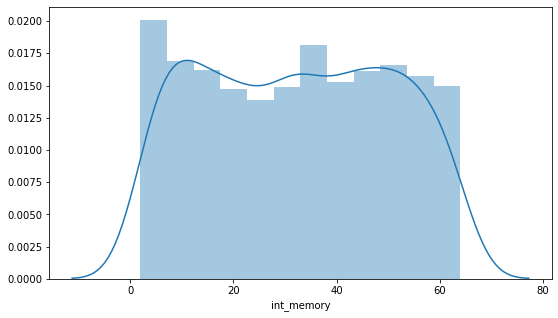

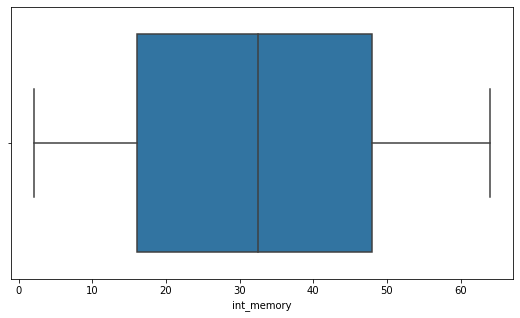

In [84]:
plot(Xy_train.int_memory)

In [85]:
Xy_train.int_memory.describe()

count    1600.000000
mean       32.270000
std        18.195165
min         2.000000
25%        16.000000
50%        32.500000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

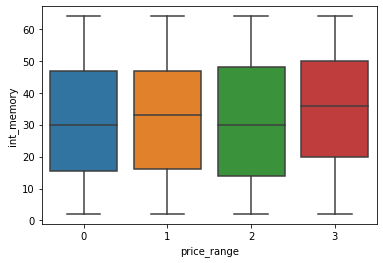

In [86]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['int_memory'])

In [87]:
anova('int_memory', 'price_range', Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to int_memory mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to int_memory mean (Good predictor)


                    sum_sq      df         F    PR(>F)
C(int_memory)    96.066613    62.0  1.273638  0.076947
Residual       1869.857762  1537.0       NaN       NaN 

Fail to reject Ho,  There is no significant difference between the levels of price_range with respect to int_memory mean (No predictability)


In [88]:
# int_memory has no predictability

action['drop'].append('int_memory')

#### m_dep

In [89]:
df_desc['m_dep']

Description    Mobile Depth in cm
Name: m_dep, dtype: object

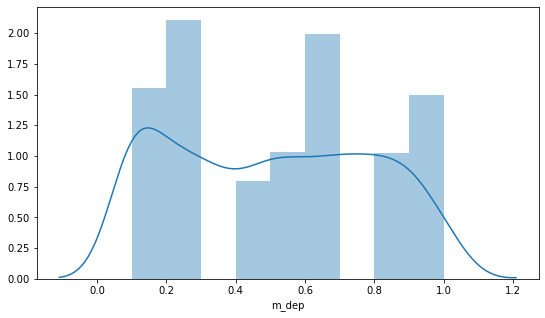

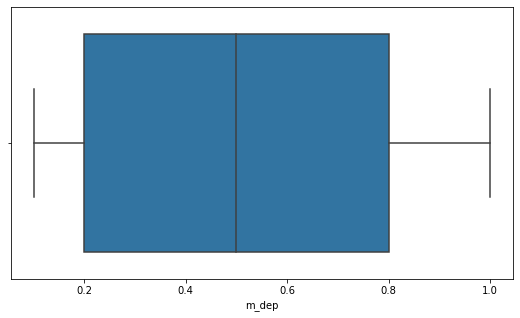

In [90]:
plot(Xy_train['m_dep'])

In [91]:
Xy_train.m_dep.value_counts()

0.1    248
0.2    176
0.5    165
0.8    164
0.7    163
0.3    161
0.9    158
0.6    156
0.4    128
1.0     81
Name: m_dep, dtype: int64

In [92]:
# m_dep is a categorical variable.

In [93]:
# Lets club it together to create 2 levels

Xy_train = Xy_train.replace({'m_dep': {
    0.1 : '0-0.5',
    0.2 : '0-0.5',
    0.3 : '0-0.5',
    0.4 : '0-0.5',
    0.5 : '0.5-1.0',
    0.6 : '0.5-1.0',
    0.7 : '0.5-1.0',
    0.8 : '0.5-1.0',
    0.9 : '0.5-1.0',
    1.0 : '0.5-1.0'
}})

In [94]:
Xy_test = Xy_test.replace({'m_dep': {
    0.1 : '0-0.5',
    0.2 : '0-0.5',
    0.3 : '0-0.5',
    0.4 : '0-0.5',
    0.5 : '0.5-1.0',
    0.6 : '0.5-1.0',
    0.7 : '0.5-1.0',
    0.8 : '0.5-1.0',
    0.9 : '0.5-1.0',
    1.0 : '0.5-1.0'
}})

In [95]:
Xy_train.m_dep.value_counts()

0.5-1.0    887
0-0.5      713
Name: m_dep, dtype: int64

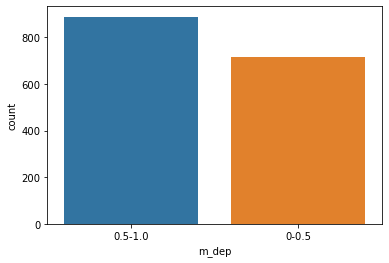

In [96]:
sns.countplot(Xy_train.m_dep)

In [97]:
# Crosstabulation

ct = pd.crosstab(index=Xy_train['m_dep'], columns=Xy_train['price_range'])
ct

price_range,0,1,2,3
m_dep,,,,
0-0.5,187,165,191,170
0.5-1.0,208,244,217,218


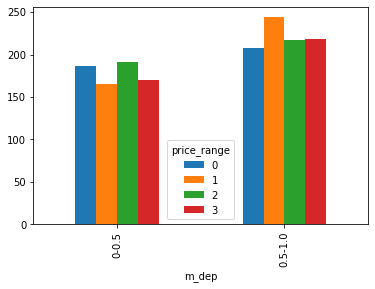

In [98]:
ct.plot(kind='bar')

In [99]:
chi2('m_dep', 'price_range', Xy_train)

Chi square test between m_dep and price_range

Ho:  There is no significant assosiation betweeen m_dep and price_range (No predictability)
Ha:  There is relation between m_dep and price_range (Good predictor)


price_range    0    1    2    3   All
m_dep                                
0-0.5        187  165  191  170   713
0.5-1.0      208  244  217  218   887
All          395  409  408  388  1600


chi-square stats:  5.108548038009736
p-value:  0.1640191091606922


Fail to reject null hypothesis,  There is no significant assosiation betweeen m_dep and price_range (No predictability)


>>> Drop m_dep


In [100]:
# m_dep is not a good predictor

action['drop'].append('m_dep')

#### mobile_wt

In [101]:
df_desc['mobile_wt']

Description    Weight of the mobile phone
Name: mobile_wt, dtype: object

In [102]:
Xy_train['mobile_wt'].describe()

count    1600.000000
mean      140.633750
std        35.338171
min        80.000000
25%       109.000000
50%       141.000000
75%       171.000000
max       200.000000
Name: mobile_wt, dtype: float64

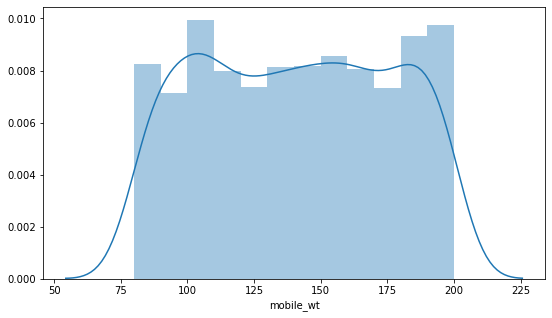

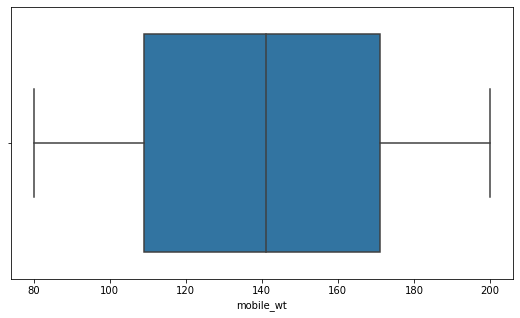

In [103]:
plot(Xy_train.mobile_wt)

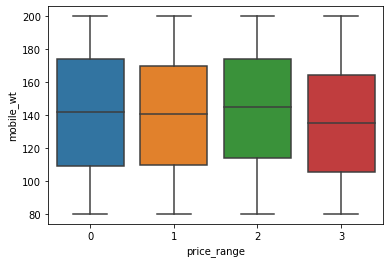

In [104]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['mobile_wt'])

In [105]:
anova('mobile_wt', 'price_range', Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to mobile_wt mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to mobile_wt mean (Good predictor)


                   sum_sq      df         F    PR(>F)
C(mobile_wt)   156.962400   120.0  1.069432  0.293713
Residual      1808.961975  1479.0       NaN       NaN 

Fail to reject Ho,  There is no significant difference between the levels of price_range with respect to mobile_wt mean (No predictability)


In [106]:
# mobile_wt is not a good predictor

action['drop'].append('mobile_wt')

#### n_cores

In [107]:
df_desc['n_cores']

Description    Number of cores of a processor
Name: n_cores, dtype: object

In [108]:
Xy_train['n_cores'].head()

968    1
240    8
819    1
692    5
420    5
Name: n_cores, dtype: int64

In [109]:
Xy_train.n_cores.value_counts()

4    220
7    216
8    207
3    203
5    193
1    192
2    190
6    179
Name: n_cores, dtype: int64

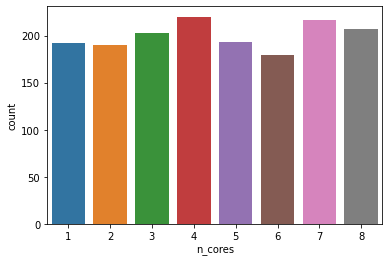

In [110]:
sns.countplot(Xy_train.n_cores)

In [111]:
ct = pd.crosstab(index=Xy_train['n_cores'], columns=Xy_train['price_range'])
ct

price_range,0,1,2,3
n_cores,,,,
1,43,64,42,43
2,55,41,46,48
3,46,59,48,50
4,50,64,61,45
5,44,40,50,59
6,49,42,45,43
7,55,47,61,53
8,53,52,55,47


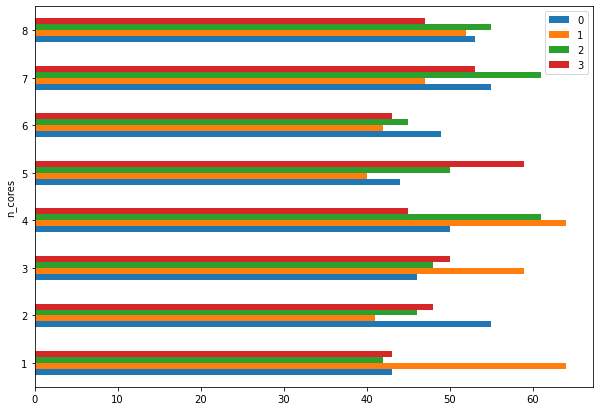

In [112]:
ct.plot(kind='barh', figsize=(10,7))
plt.legend()

In [113]:
# Lets try clubbing values

Xy_train = Xy_train.replace({'n_cores': {
    1 : '1-3',
    2 : '1-3',
    3 : '1-3',
    4 : '4-6',
    5 : '4-6',
    6 : '4-6',
    7 : '7-8',
    8 : '7-8'
}})

In [114]:
Xy_test = Xy_test.replace({'n_cores': {
    1 : '1-3',
    2 : '1-3',
    3 : '1-3',
    4 : '4-6',
    5 : '4-6',
    6 : '4-6',
    7 : '7-8',
    8 : '7-8'
}})

In [115]:
Xy_train.n_cores.value_counts()

4-6    592
1-3    585
7-8    423
Name: n_cores, dtype: int64

In [116]:
Xy_test.n_cores.value_counts()

4-6    158
1-3    150
7-8     92
Name: n_cores, dtype: int64

In [117]:
ct = pd.crosstab(index=Xy_train['n_cores'], columns=Xy_train['price_range'], margins=True)
ct

price_range,0,1,2,3,All
n_cores,,,,,
1-3,144,164,136,141,585
4-6,143,146,156,147,592
7-8,108,99,116,100,423
All,395,409,408,388,1600


In [118]:
chi2(x='n_cores', y='price_range', data=Xy_train)

Chi square test between n_cores and price_range

Ho:  There is no significant assosiation betweeen n_cores and price_range (No predictability)
Ha:  There is relation between n_cores and price_range (Good predictor)


price_range    0    1    2    3   All
n_cores                              
1-3          144  164  136  141   585
4-6          143  146  156  147   592
7-8          108   99  116  100   423
All          395  409  408  388  1600


chi-square stats:  4.645763902473517
p-value:  0.5899801288409281


Fail to reject null hypothesis,  There is no significant assosiation betweeen n_cores and price_range (No predictability)


>>> Drop n_cores


In [119]:
# n_cores is not a good predictor

action['drop'].append('n_cores')

#### pc

In [120]:
df_desc['pc']

Description    Primary Camera megapixels
Name: pc, dtype: object

In [121]:
Xy_train['pc'].head()

968    10
240     1
819    14
692     7
420    12
Name: pc, dtype: int64

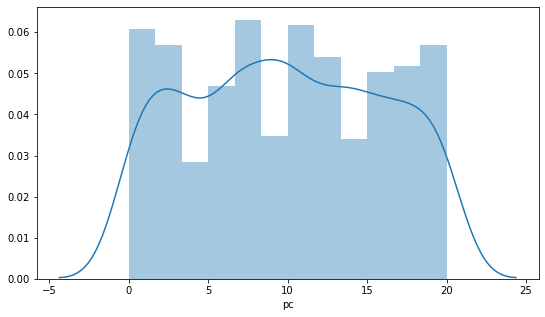

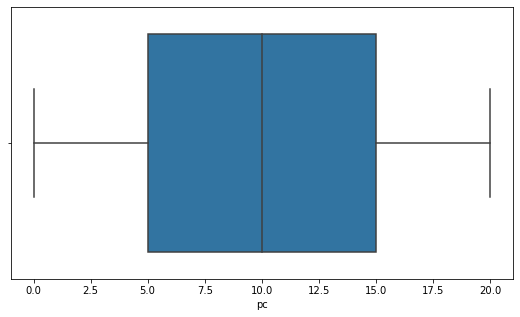

In [122]:
plot(Xy_train['pc'])

In [123]:
Xy_train.pc.describe()

count    1600.000000
mean        9.878125
std         6.014847
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

In [124]:
Xy_train.pc.value_counts()

7     101
10    100
9      93
14     91
20     87
1      82
6      81
0      80
12     78
3      78
4      76
2      74
17     73
16     72
8      67
13     66
11     65
19     65
18     65
15     62
5      44
Name: pc, dtype: int64

In [125]:
# treating pc as a categorical variable

In [126]:
# Lets club some values together

Xy_train = Xy_train.replace({'pc': {
    0 : '0-5',
    1 : '0-5',
    2 : '0-5',
    3 : '0-5',
    4 : '0-5',
    5 : '0-5',
    6 : '6-10',
    7 : '6-10',
    8 : '6-10',
    9 : '6-10',
    10 : '6-10',
    11 : '11-15',
    12 : '11-15',
    13 : '11-15',
    14 : '11-15',
    15 : '11-15',
    16 : '16-20',
    17 : '16-20',
    18 : '16-20',
    19 : '16-20',
    20 : '16-20'
}})

In [127]:

Xy_test = Xy_test.replace({'pc': {
    0 : '0-5',
    1 : '0-5',
    2 : '0-5',
    3 : '0-5',
    4 : '0-5',
    5 : '0-5',
    6 : '6-10',
    7 : '6-10',
    8 : '6-10',
    9 : '6-10',
    10 : '6-10',
    11 : '11-15',
    12 : '11-15',
    13 : '11-15',
    14 : '11-15',
    15 : '11-15',
    16 : '16-20',
    17 : '16-20',
    18 : '16-20',
    19 : '16-20',
    20 : '16-20'
}})

In [128]:
Xy_train.pc.value_counts()

6-10     442
0-5      434
11-15    362
16-20    362
Name: pc, dtype: int64

In [129]:
Xy_test.pc.value_counts()

0-5      117
16-20    100
6-10      95
11-15     88
Name: pc, dtype: int64

In [130]:
chi2('pc', 'price_range', Xy_train)

Chi square test between pc and price_range

Ho:  There is no significant assosiation betweeen pc and price_range (No predictability)
Ha:  There is relation between pc and price_range (Good predictor)


price_range    0    1    2    3   All
pc                                   
0-5          119  108  100  107   434
11-15         91   93   93   85   362
16-20         80   95   94   93   362
6-10         105  113  121  103   442
All          395  409  408  388  1600


chi-square stats:  4.890663055190001
p-value:  0.8437333375082302


Fail to reject null hypothesis,  There is no significant assosiation betweeen pc and price_range (No predictability)


>>> Drop pc


In [131]:
# pc is not a good predictor

action['drop'].append('pc')

#### px_height

In [132]:
df_desc['px_height']

Description    Pixel Resolution Height
Name: px_height, dtype: object

In [133]:
Xy_train.px_height.head()

968    767
240    529
819    517
692    304
420    823
Name: px_height, dtype: int64

In [134]:
Xy_train.px_height.describe()

count    1600.000000
mean      644.213125
std       445.398396
min         0.000000
25%       280.000000
50%       554.500000
75%       945.500000
max      1944.000000
Name: px_height, dtype: float64

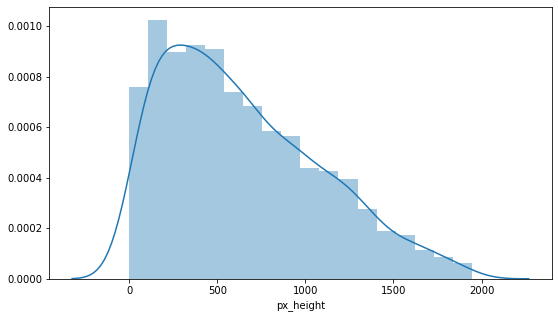

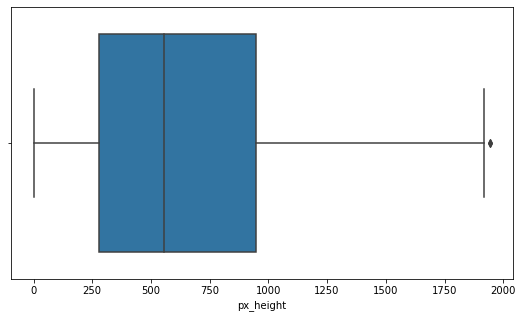

In [135]:
plot(Xy_train['px_height'])

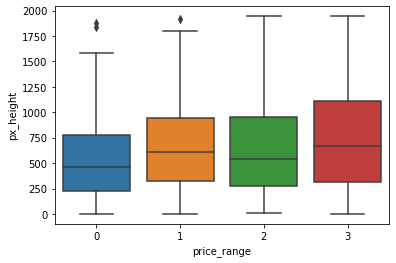

In [136]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['px_height'])

In [137]:
anova('px_height', 'price_range', Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to px_height mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to px_height mean (Good predictor)


                   sum_sq      df         F    PR(>F)
C(px_height)  1228.095804  1010.0  0.970668  0.660149
Residual       737.828571   589.0       NaN       NaN 

Fail to reject Ho,  There is no significant difference between the levels of price_range with respect to px_height mean (No predictability)


In [138]:
# px_height is not a good predictor

action['drop'].append('px_height')

#### px_width

In [139]:
df_desc['px_width']

Description    Pixel Resolution Width
Name: px_width, dtype: object

In [140]:
Xy_train.px_width.head()

968    1759
240    1009
819     809
692    1674
420    1104
Name: px_width, dtype: int64

In [141]:
Xy_train.px_width.describe()

count    1600.000000
mean     1249.091875
std       431.530171
min       500.000000
25%       874.000000
50%      1241.500000
75%      1626.250000
max      1998.000000
Name: px_width, dtype: float64

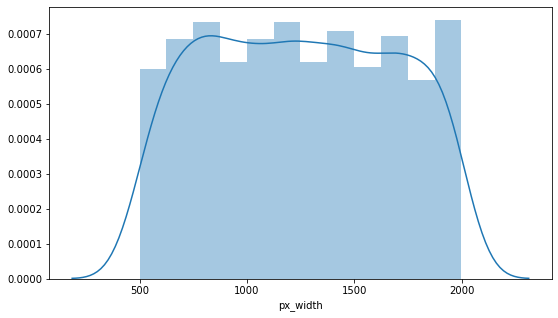

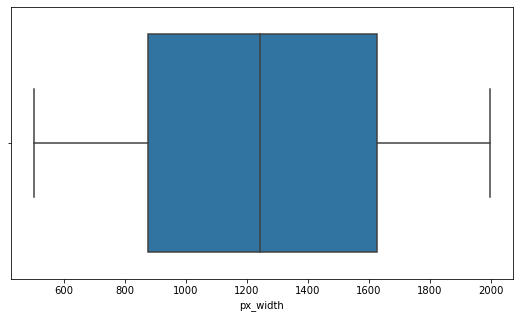

In [142]:
plot(Xy_train['px_width'])

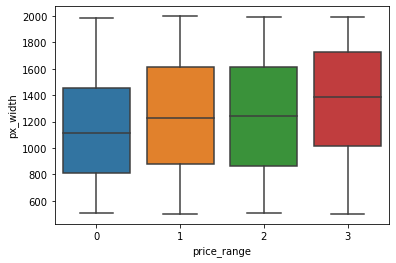

In [143]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['px_width'])

In [144]:
anova('px_width', 'price_range', Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to px_width mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to px_width mean (Good predictor)


                  sum_sq      df         F   PR(>F)
C(px_width)  1292.424375  1000.0  1.149461  0.02952
Residual      673.500000   599.0       NaN      NaN 

Reject Ho,  There is a significant difference between the levels of price_range with respect to px_width mean (Good predictor)


In [145]:
# px_width is a good predictor

#### ram

In [146]:
df_desc['ram']

Description    Random Access Memory in MegaBytes
Name: ram, dtype: object

In [147]:
Xy_train.ram.head()

968    1489
240    3560
819    1406
692    3508
420    1587
Name: ram, dtype: int64

In [148]:
Xy_train.ram.describe()

count    1600.000000
mean     2116.131250
std      1080.711326
min       258.000000
25%      1212.750000
50%      2110.500000
75%      3042.000000
max      3998.000000
Name: ram, dtype: float64

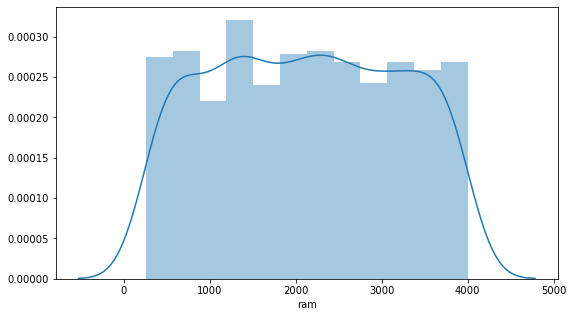

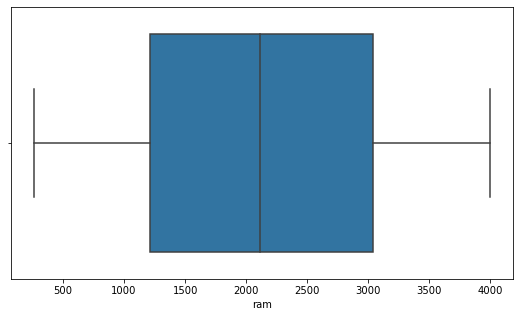

In [149]:
plot(Xy_train['ram'])

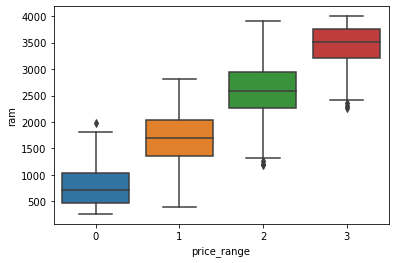

In [150]:
sns.boxplot(x=Xy_train['price_range'], y=Xy_train['ram'])

In [151]:
anova('ram', 'price_range', Xy_train)

Ho:  There is no significant difference between the levels of price_range with respect to ram mean (No predictability)
Ha:  There is a significant difference between the levels of price_range with respect to ram mean (Good predictor)


               sum_sq      df         F        PR(>F)
C(ram)    1907.341042  1297.0  7.580908  7.566792e-73
Residual    58.583333   302.0       NaN           NaN 

Reject Ho,  There is a significant difference between the levels of price_range with respect to ram mean (Good predictor)


In [152]:
# ram is a good predictor of price_range

#### sc_h

In [153]:
df_desc['sc_h']

Description    Screen Height of mobile in cm
Name: sc_h, dtype: object

In [154]:
Xy_train.sc_h.head()

968    10
240    11
819    14
692    13
420     6
Name: sc_h, dtype: int64

In [155]:
Xy_train.sc_h.describe()

count    1600.000000
mean       12.220000
std         4.205372
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64

In [156]:
Xy_train.sc_h.value_counts()

17    154
12    130
7     125
14    114
15    112
9     109
13    107
16    104
11     98
19     96
10     95
8      93
6      93
18     91
5      79
Name: sc_h, dtype: int64

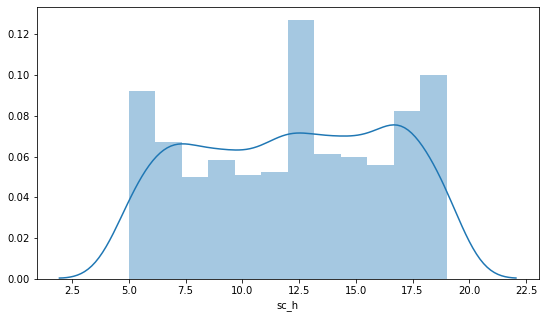

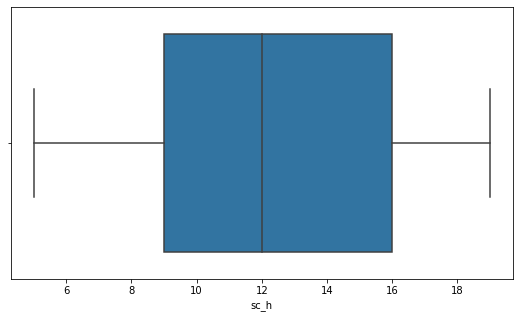

In [157]:
plot(Xy_train['sc_h'])

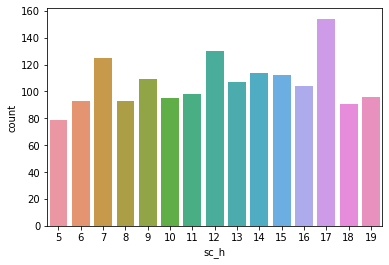

In [158]:
sns.countplot(Xy_train.sc_h)

In [159]:
# Lets treat sc_h as a categorical variable

Xy_train = Xy_train.replace({'sc_h': {
    5 : '5-10 cm',
    6 : '5-10 cm',
    7 : '5-10 cm',
    8 : '5-10 cm',
    9 : '5-10 cm',
    10 : '5-10 cm',
    11 : '11-15 cm',
    12 : '11-15 cm',
    13 : '11-15 cm',
    14 : '11-15 cm',
    15 : '11-15 cm',
    16 : '16-20 cm',
    17 : '16-20 cm',
    18 : '16-20 cm',
    19 : '16-20 cm'
}})

In [160]:
Xy_test = Xy_test.replace({'sc_h': {
    5 : '5-10 cm',
    6 : '5-10 cm',
    7 : '5-10 cm',
    8 : '5-10 cm',
    9 : '5-10 cm',
    10 : '5-10 cm',
    11 : '11-15 cm',
    12 : '11-15 cm',
    13 : '11-15 cm',
    14 : '11-15 cm',
    15 : '11-15 cm',
    16 : '16-20 cm',
    17 : '16-20 cm',
    18 : '16-20 cm',
    19 : '16-20 cm'
}})

In [161]:
Xy_train.sc_h.value_counts()

5-10 cm     594
11-15 cm    561
16-20 cm    445
Name: sc_h, dtype: int64

In [162]:
Xy_test.sc_h.value_counts()

16-20 cm    135
5-10 cm     134
11-15 cm    131
Name: sc_h, dtype: int64

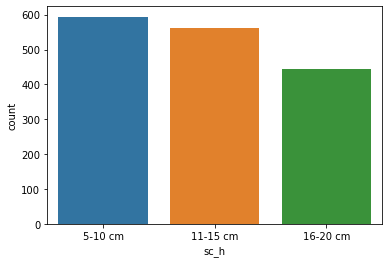

In [163]:
sns.countplot(Xy_train.sc_h)

In [164]:
chi2('sc_h', 'price_range', Xy_train)

Chi square test between sc_h and price_range

Ho:  There is no significant assosiation betweeen sc_h and price_range (No predictability)
Ha:  There is relation between sc_h and price_range (Good predictor)


price_range    0    1    2    3   All
sc_h                                 
11-15 cm     146  141  138  136   561
16-20 cm     104  118  101  122   445
5-10 cm      145  150  169  130   594
All          395  409  408  388  1600


chi-square stats:  7.746044623971593
p-value:  0.2573053846276487


Fail to reject null hypothesis,  There is no significant assosiation betweeen sc_h and price_range (No predictability)


>>> Drop sc_h


In [165]:
# sc_h is not a good predictor

action['drop'].append('sc_h')

#### sc_w

In [166]:
df_desc['sc_w']

Description    Screen Width of mobile in cm
Name: sc_w, dtype: object

In [167]:
Xy_train.sc_w.head()

968     9
240     1
819    12
692     8
420     5
Name: sc_w, dtype: int64

In [168]:
Xy_train.sc_w.describe()

count    1600.000000
mean        5.705625
std         4.338863
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [169]:
Xy_train.sc_w.value_counts()

1     164
3     158
0     150
4     149
5     138
2     126
6     104
7     104
8      98
10     81
9      77
11     65
12     60
13     31
15     26
16     25
14     23
17     14
18      7
Name: sc_w, dtype: int64

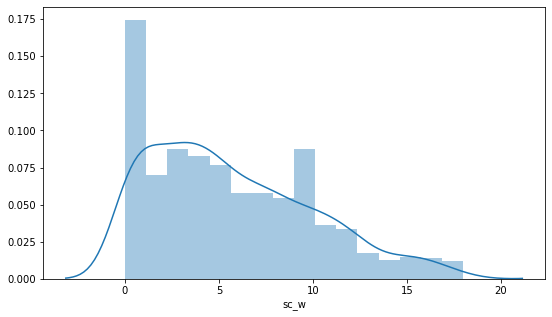

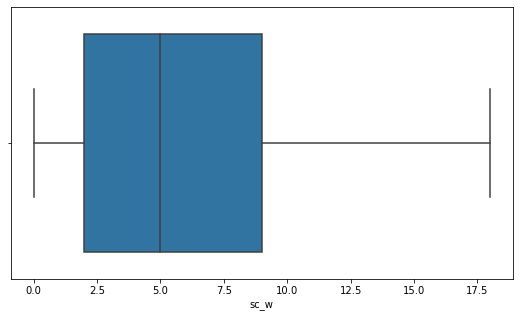

In [170]:
plot(Xy_train['sc_w'])

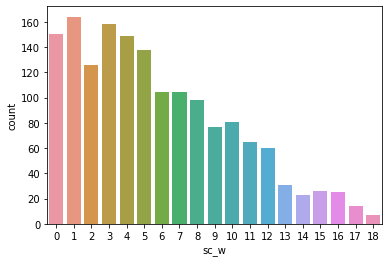

In [171]:
sns.countplot(Xy_train.sc_w)

In [172]:
# Lets treat sc_w as a categorical variable

Xy_train = Xy_train.replace({'sc_w': {
    0 : '0-4 cm',
    1 : '0-4 cm',
    2 : '0-4 cm',
    3 : '0-4 cm',
    4 : '0-4 cm',
    5 : '5-9 cm',
    6 : '5-9 cm',
    7 : '5-9 cm',
    8 : '5-9 cm',
    9 : '5-9 cm',
    10 : '10 cm & above',
    11 : '10 cm & above',
    12 : '10 cm & above',
    13 : '10 cm & above',
    14 : '10 cm & above',
    15 : '10 cm & above',
    16 : '10 cm & above',
    17 : '10 cm & above',
    18 : '10 cm & above'
}})

In [173]:
Xy_test = Xy_test.replace({'sc_w': {
    0 : '0-4 cm',
    1 : '0-4 cm',
    2 : '0-4 cm',
    3 : '0-4 cm',
    4 : '0-4 cm',
    5 : '5-9 cm',
    6 : '5-9 cm',
    7 : '5-9 cm',
    8 : '5-9 cm',
    9 : '5-9 cm',
    10 : '10 cm & above',
    11 : '10 cm & above',
    12 : '10 cm & above',
    13 : '10 cm & above',
    14 : '10 cm & above',
    15 : '10 cm & above',
    16 : '10 cm & above',
    17 : '10 cm & above',
    18 : '10 cm & above'
}})

In [174]:
Xy_train.sc_w.value_counts()

0-4 cm           747
5-9 cm           521
10 cm & above    332
Name: sc_w, dtype: int64

In [175]:
Xy_test.sc_w.value_counts()

0-4 cm           180
5-9 cm           124
10 cm & above     96
Name: sc_w, dtype: int64

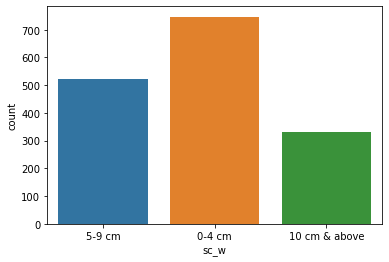

In [176]:
sns.countplot(Xy_train.sc_w)

In [177]:
chi2('sc_w', 'price_range', Xy_train)

Chi square test between sc_w and price_range

Ho:  There is no significant assosiation betweeen sc_w and price_range (No predictability)
Ha:  There is relation between sc_w and price_range (Good predictor)


price_range      0    1    2    3   All
sc_w                                   
0-4 cm         188  198  185  176   747
10 cm & above   78   77   80   97   332
5-9 cm         129  134  143  115   521
All            395  409  408  388  1600


chi-square stats:  6.98803569824192
p-value:  0.3219550698300692


Fail to reject null hypothesis,  There is no significant assosiation betweeen sc_w and price_range (No predictability)


>>> Drop sc_w


In [178]:
# sc_w is not a good predictor

action['drop'].append('sc_w')

#### talk_time

In [179]:
df_desc['talk_time']

Description    The longest time that a single battery charge will last when you are
Name: talk_time, dtype: object

In [180]:
Xy_train.talk_time.head()

968     3
240    16
819    20
692     5
420    20
Name: talk_time, dtype: int64

In [181]:
Xy_train.talk_time.describe()

count    1600.000000
mean       10.956875
std         5.507742
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

In [182]:
Xy_train.talk_time.value_counts()

4     100
16    100
7      97
19     90
6      90
2      86
15     86
13     84
18     83
20     82
11     82
9      81
8      80
12     80
10     79
5      77
3      76
17     74
14     73
Name: talk_time, dtype: int64

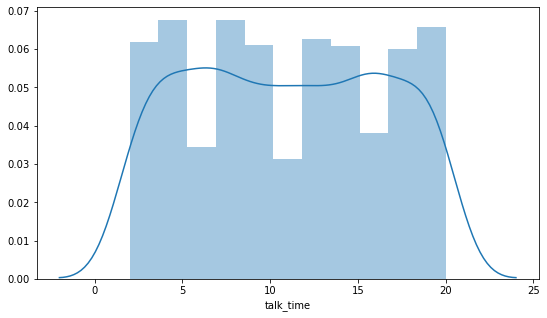

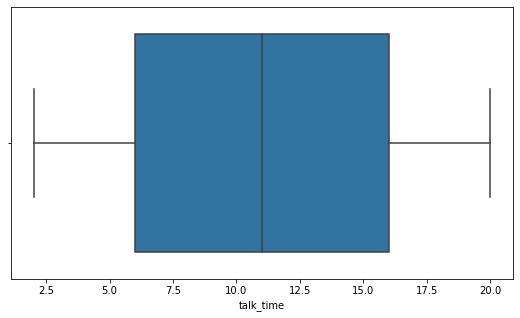

In [183]:
plot(Xy_train['talk_time'])

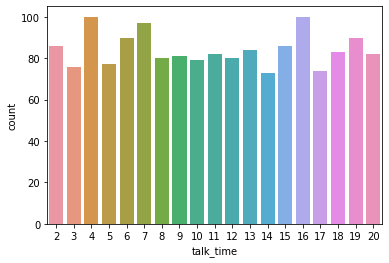

In [184]:
sns.countplot(Xy_train.talk_time)

In [185]:
# Lets treat this variable as categorical

Xy_train = Xy_train.replace({'talk_time': {
    2 : '2-8',
    3 : '2-8',
    4 : '2-8',
    5 : '2-8',
    6 : '2-8',
    7 : '2-8',
    8 : '2-8',
    9 : '9-15',
    10 : '9-15',
    11 : '9-15',
    12 : '9-15',
    13 : '9-15',
    14 : '9-15',
    15 : '9-15',
    16 : '16-20',
    17 : '16-20',
    18 : '16-20',
    19 : '16-20', 
    20 : '16-20'
}})

In [186]:

Xy_test = Xy_test.replace({'talk_time': {
    2 : '2-8',
    3 : '2-8',
    4 : '2-8',
    5 : '2-8',
    6 : '2-8',
    7 : '2-8',
    8 : '2-8',
    9 : '9-15',
    10 : '9-15',
    11 : '9-15',
    12 : '9-15',
    13 : '9-15',
    14 : '9-15',
    15 : '9-15',
    16 : '16-20',
    17 : '16-20',
    18 : '16-20',
    19 : '16-20', 
    20 : '16-20'
}})

In [187]:
Xy_train.talk_time.value_counts()

2-8      606
9-15     565
16-20    429
Name: talk_time, dtype: int64

In [188]:
Xy_train.talk_time.value_counts()

2-8      606
9-15     565
16-20    429
Name: talk_time, dtype: int64

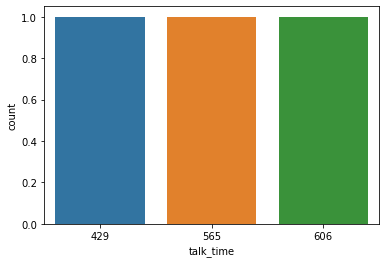

In [189]:
sns.countplot(Xy_train.talk_time.value_counts())

In [190]:
chi2('talk_time', 'price_range', Xy_train)

Chi square test between talk_time and price_range

Ho:  There is no significant assosiation betweeen talk_time and price_range (No predictability)
Ha:  There is relation between talk_time and price_range (Good predictor)


price_range    0    1    2    3   All
talk_time                            
16-20         98  120  103  108   429
2-8          159  138  162  147   606
9-15         138  151  143  133   565
All          395  409  408  388  1600


chi-square stats:  5.327131756599227
p-value:  0.502591278959609


Fail to reject null hypothesis,  There is no significant assosiation betweeen talk_time and price_range (No predictability)


>>> Drop talk_time


In [191]:
# talk_time is not a good predictor

action['drop'].append('talk_time')

# Preprocessing

In [193]:
# Lets split the independent and dependent variables again.

X_train = Xy_train.drop('price_range', axis=1)
y_train = Xy_train[['price_range']]

In [194]:
X_test = Xy_test.drop('price_range', axis=1)
y_test = Xy_test[['price_range']]

In [195]:
X_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
968,1923,0.5,6-10 pixel,46,0.5-1.0,191,1-3,6-10,767,1759,1489,5-10 cm,5-9 cm,2-8
240,633,2.2,No pixel,49,0-0.5,139,7-8,0-5,529,1009,3560,11-15 cm,0-4 cm,16-20
819,1236,0.9,1-5 pixel,57,0-0.5,188,1-3,11-15,517,809,1406,11-15 cm,10 cm & above,16-20
692,781,1.1,1-5 pixel,38,0-0.5,198,4-6,6-10,304,1674,3508,11-15 cm,5-9 cm,2-8
420,1456,0.5,6-10 pixel,7,0-0.5,105,4-6,11-15,823,1104,1587,5-10 cm,5-9 cm,16-20


In [196]:
y_train.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [197]:
X_test.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
1860,1646,2.5,1-5 pixel,25,0.5-1.0,200,1-3,0-5,211,1608,686,5-10 cm,5-9 cm,9-15
353,1182,0.5,6-10 pixel,8,0.5-1.0,138,7-8,16-20,275,986,2563,16-20 cm,10 cm & above,16-20
1333,1972,2.9,6-10 pixel,14,0-0.5,196,7-8,16-20,293,952,1316,5-10 cm,0-4 cm,2-8
905,989,2.0,1-5 pixel,17,0-0.5,166,1-3,16-20,256,1394,3892,16-20 cm,5-9 cm,16-20
1289,615,0.5,6-10 pixel,58,0.5-1.0,130,4-6,6-10,1021,1958,1906,11-15 cm,5-9 cm,2-8


In [198]:
y_test.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [199]:
X_train.shape

(1600, 14)

In [200]:
y_train.shape

(1600, 1)

In [201]:
X_test.shape

(400, 14)

In [202]:
y_test.shape

(400, 1)

In [211]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 968 to 1126
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   clock_speed    1600 non-null   float64
 2   fc             1600 non-null   object 
 3   int_memory     1600 non-null   int64  
 4   m_dep          1600 non-null   object 
 5   mobile_wt      1600 non-null   int64  
 6   n_cores        1600 non-null   object 
 7   pc             1600 non-null   object 
 8   px_height      1600 non-null   int64  
 9   px_width       1600 non-null   int64  
 10  ram            1600 non-null   int64  
 11  sc_h           1600 non-null   object 
 12  sc_w           1600 non-null   object 
 13  talk_time      1600 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 187.5+ KB


In [214]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cat_cols

['fc', 'm_dep', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time']

In [221]:
# Encoding categorical variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse=False, drop='first')
ct = ColumnTransformer([
    ('catagorical', ohe, cat_cols)
], remainder='passthrough')

X_train_ohe = ct.fit_transform(X_train)
X_test_ohe = ct.transform(X_test)

In [222]:
X_train_ohe[0]

array([0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 1.923e+03, 5.000e-01, 4.600e+01,
       1.910e+02, 7.670e+02, 1.759e+03, 1.489e+03])

In [223]:
X_test_ohe[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 1.646e+03, 2.500e+00, 2.500e+01,
       2.000e+02, 2.110e+02, 1.608e+03, 6.860e+02])

In [203]:
# Lets create another training and testing set without unnecessary variables

In [204]:
X_train_drop = X_train.drop(action['drop'], axis=1)

X_test_drop = X_test.drop(action['drop'], axis=1)

In [205]:
X_train_drop.head()

,battery_power,px_width,ram
968,1923,1759,1489
240,633,1009,3560
819,1236,809,1406
692,781,1674,3508
420,1456,1104,1587


In [206]:
X_test_drop.head()

,battery_power,px_width,ram
1860,1646,1608,686
353,1182,986,2563
1333,1972,952,1316
905,989,1394,3892
1289,615,1958,1906


In [207]:
# Lets create a Logistic model as a base.

# Model 1 : Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
model1 = LogisticRegression()

In [224]:
model1.fit(X_train_ohe, y_train)

LogisticRegression()

In [225]:
y_pred = model1.predict(X_test_ohe)

In [226]:
y_pred

array([0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 0, 1, 2, 3, 3, 2, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 3, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 3, 3, 2, 2, 0,
       3, 3, 1, 1, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 3, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 0, 1,
       0, 0, 3, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 1, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 1, 3, 1, 1, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 3, 0, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 2, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 3, 0, 2, 3, 1, 3, 1, 0, 3, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 2, 2, 0, 0, 0, 0, 3, 3,

In [229]:
y_test.values.flatten()

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [237]:
y_pred_proba = model1.predict_proba(X_test_ohe)

In [238]:
y_pred_proba

array([[9.83318690e-01, 1.65066344e-02, 1.74336467e-04, 3.39550813e-07],
       [1.37407944e-03, 1.50977431e-01, 5.46053669e-01, 3.01594821e-01],
       [7.12116134e-01, 2.66828409e-01, 2.08578775e-02, 1.97580031e-04],
       ...,
       [2.37142924e-03, 1.82739539e-01, 4.68587607e-01, 3.46301425e-01],
       [2.55757864e-03, 1.63534364e-01, 4.15545013e-01, 4.18363045e-01],
       [5.68485298e-03, 3.54828757e-01, 5.00709201e-01, 1.38777189e-01]])

## Model Evaluation

#### accuracy

In [230]:
from sklearn.metrics import accuracy_score
model1_acc = accuracy_score(y_test, y_pred)

In [231]:
model1_acc

0.635

#### precision

In [234]:
from sklearn.metrics import precision_score
model1_pre = precision_score(y_test, y_pred, average=None)

In [235]:
model1_pre

array([0.81443299, 0.51136364, 0.5       , 0.68595041])

#### Classification report 

In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.51      0.49      0.50        91
           2       0.50      0.51      0.51        92
           3       0.69      0.74      0.71       112

    accuracy                           0.64       400
   macro avg       0.63      0.62      0.63       400
weighted avg       0.64      0.64      0.64       400



#### Confusion_matrix

In [241]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[['Actual', 'Actual', 'Actual', 'Actual'],[0,1,2,3]],
                 columns=[['Predicted', 'Predicted', 'Predicted', 'Predicted'], [0,1,2,3]])
cm

Predicted            
                 0   1   2   3
Actual 0        79  25   1   0
       1        18  45  19   9
       2         0  16  47  29
       3         0   2  27  83

In [260]:
cm['Predicted'][2][2]

47

In [258]:
cm['Predicted'][0][0]/(cm['Predicted'][0][0]+cm['Predicted'][0][1]+cm['Predicted'][0][2]+cm['Predicted'][0][3])

0.8144329896907216

In [283]:
def accuracy(cm):
    accuracy.acc0 = cm['Predicted'][0][0]/(cm['Predicted'][0][0]+cm['Predicted'][0][1]+cm['Predicted'][0][2]+cm['Predicted'][0][3])
    accuracy.acc1 = cm['Predicted'][1][1]/(cm['Predicted'][1][0]+cm['Predicted'][1][1]+cm['Predicted'][1][2]+cm['Predicted'][1][3])
    accuracy.acc2 = cm['Predicted'][2][2]/(cm['Predicted'][2][0]+cm['Predicted'][2][1]+cm['Predicted'][2][2]+cm['Predicted'][2][3])
    accuracy.acc3 = cm['Predicted'][3][3]/(cm['Predicted'][3][0]+cm['Predicted'][3][1]+cm['Predicted'][3][2]+cm['Predicted'][3][3])
    
    return acc0, acc1, acc2, acc3

model1_acc0, model1_acc1, model1_acc2, model1_acc3 = accuracy(cm)

In [284]:
accuracy(cm)

In [285]:
acc3

NameError: name 'acc3' is not defined

In [270]:
model1_acc0

0.8144329896907216

In [271]:
model1_acc1

0.5113636363636364

In [272]:
model1_acc2

0.5

In [273]:
model1_acc3

0.6859504132231405